# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Loading Dataset

In [2]:
# Using pandas 'read_csv' function to read the csv file
df = pd.read_csv('shopping_behavior_updated.csv')
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


# Exploring Dataset:

In [3]:
df.info() # using info function to print details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
# The above information shows that the dataset has 3900 entries (rows) and 18 columns
# Dataset have categorical, and numeric columns both

# Null Values:

In [5]:
df.isnull().sum() # Using is nul

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
# The above information shows that the dataset has not a null values.

# Exploring Duplicates:

In [7]:
# Using duplicated function to explore the duplicate entries and
#it is showing that the dataset has not any duplicate entries
df.duplicated().sum()

0

# Exploring Statistical Information:

In [8]:
df.describe().T # Using describe function to understand statistics of dataset

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [9]:
# the above statistics shows that the 60% customer purchased items with 60 USD amount.
# the review rating is quite below 4 apporox 3.7 which might be the reason majority of customers don't shop.
# Customers above 40 age are more likely to purchase items online.

In [10]:
numerical_df = df.select_dtypes(include=['int', 'float']).drop('Customer ID', axis = 1) # Extracting categorical columns for label encoding
numerical_columns = numerical_df.columns

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Calculate mean, median, standard deviation, skewness, and kurtosis for each numeric column
statistics = {
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Standard Deviation': numerical_df.std(),
    'Skewness': numerical_df.apply(skew),
    'Kurtosis': numerical_df.apply(kurtosis)
}

# Convert statistics to a DataFrame for plotting
statistics_df = pd.DataFrame(statistics)
print(statistics_df)


                            Mean  Median  Standard Deviation  Skewness  Kurtosis
Age                    44.068462    44.0           15.207589 -0.006377 -1.195094
Purchase Amount (USD)  59.764359    60.0           23.685392  0.012697 -1.236547
Review Rating           3.749949     3.7            0.716223  0.004523 -1.179655
Previous Purchases     25.351538    25.0           14.447125  0.003120 -1.190200


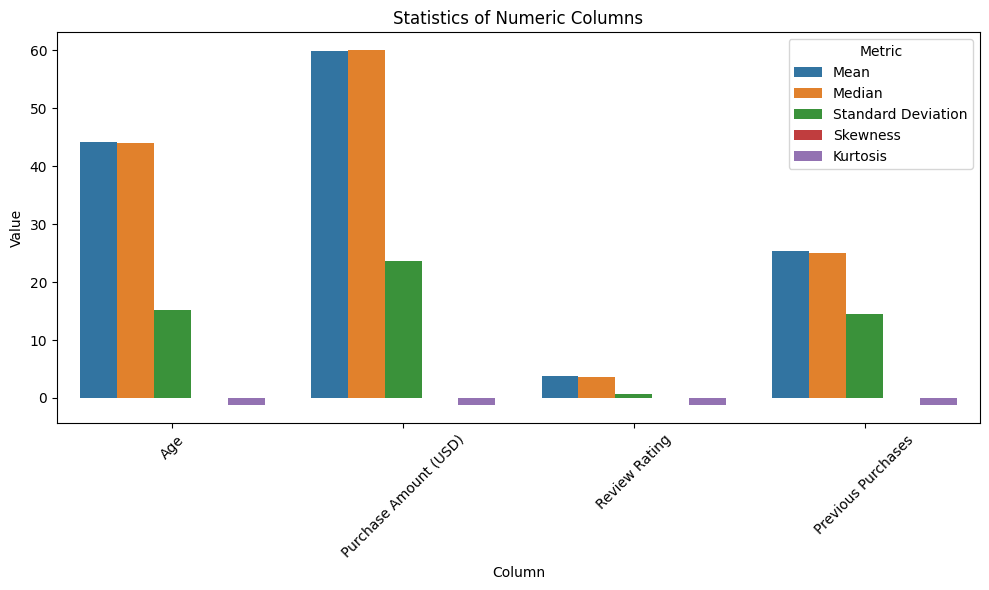

In [65]:
# Reset index to turn the index into a column
statistics_df.reset_index(inplace=True)

# Melt the DataFrame
melted_df = statistics_df.melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plot the statistics
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Statistic', data=melted_df)
plt.title('Statistics of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Visualization:

In [12]:
# box plot
def box_plot(x_axis, y_axis, dataframe, title):
  '''Function for box plot, takes x, y and dataset'''
  plt.figure(figsize = (6, 4))
  sns.boxplot(x = x_axis, y = y_axis, data = dataframe)
  plt.title(title)
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.xticks(rotation = 45)
  plt.grid(True)
  plt.show()

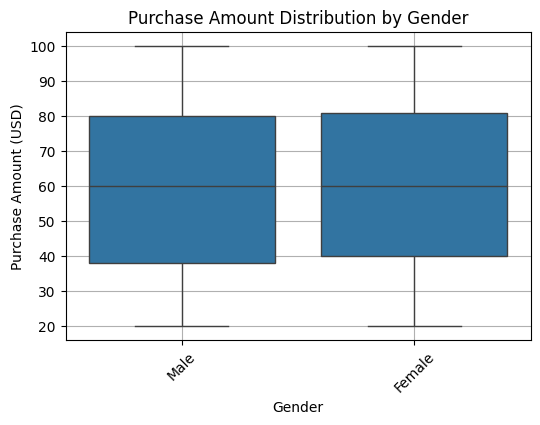

In [13]:
# plotting box_plot with Gender and Purchase Amount (USD)
box_plot('Gender', 'Purchase Amount (USD)', df, 'Purchase Amount Distribution by Gender')

In [14]:
# above box_plot shows that majority Male and Female purchase items with 40 (USD) to 80 (USD)

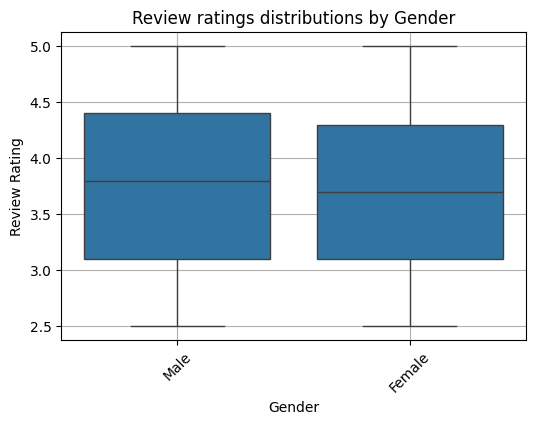

In [15]:
# box_plot between Gender and Reviews Ratings
box_plot('Gender', 'Review Rating', df, 'Review ratings distributions by Gender')

In [16]:
# Insights related to above plot:
# Female has given 3.6 mean average rating
# Male has given 3.7 mean average rating
# Store needs to work on review rating to decrease the churn rate of customers

# Line_Plot

In [17]:
def line_plot(values, x_axis, y_axis, title):
  ''' Function that takes x and y value and will return a line plot'''
  plt.figure(figsize=(5, 6))
  values.plot(kind='line', marker='o')
  plt.title(title)
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.xticks(rotation = 45)
  plt.grid(True)
  plt.show()

# Seasons effect on Sales:

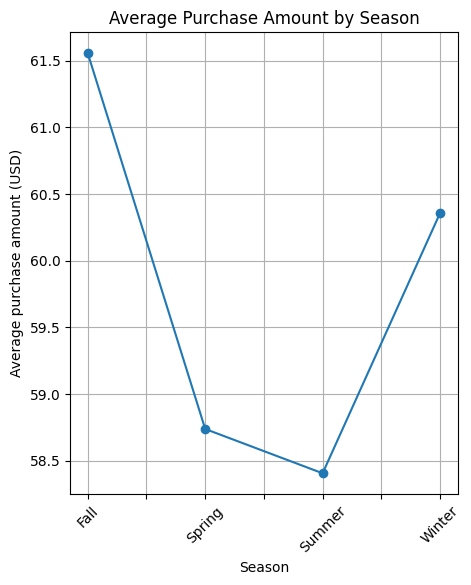

In [18]:
# Analysis of seasonal trends in purchases
seasonal_purchase_amount = df.groupby('Season')['Purchase Amount (USD)'].mean()
line_plot(seasonal_purchase_amount, 'Season', 'Average purchase amount (USD)', 'Average Purchase Amount by Season' )

In [19]:
# Fall and Winter have the highest average purchase amount out of all the seasons.
# Spring and Summer average purchase amount is not far behind the higher two seasons.

In [20]:
# bar_plot
def bar_plot(values, x_axis, y_axis, title, font_size=12 ):
  ''' function take x and y axis values and will plot a bar plot'''
  values.plot(kind = 'bar', x = x_axis, y = values.values, fontsize = font_size)
  plt.title(title, fontsize=25)
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.xticks(rotation = 90)
  plt.grid(True)
  plt.show()
  plt.savefig('location plot')

# Sales per Category:

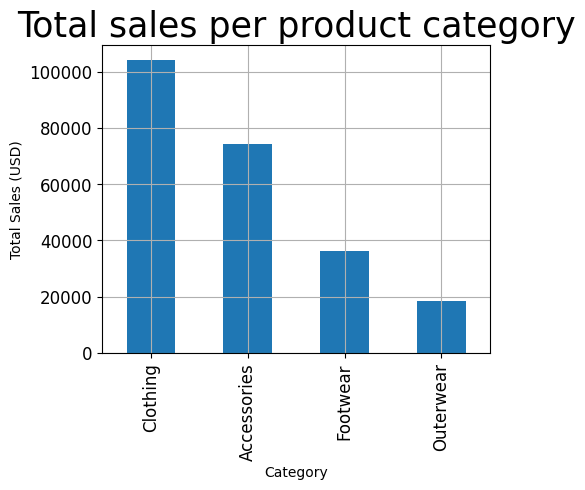

<Figure size 640x480 with 0 Axes>

In [21]:
# Exploring which category type has a highest  and lowest selling?
category_sales = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending = False)
plt.figure(figsize = (5, 4))
bar_plot(category_sales, 'Category', 'Total Sales (USD)', 'Total sales per product category')

In [22]:
# Above plot shows:
# Clothing has the best purchase history with outerwear having the lowest.

# Sales per Location:

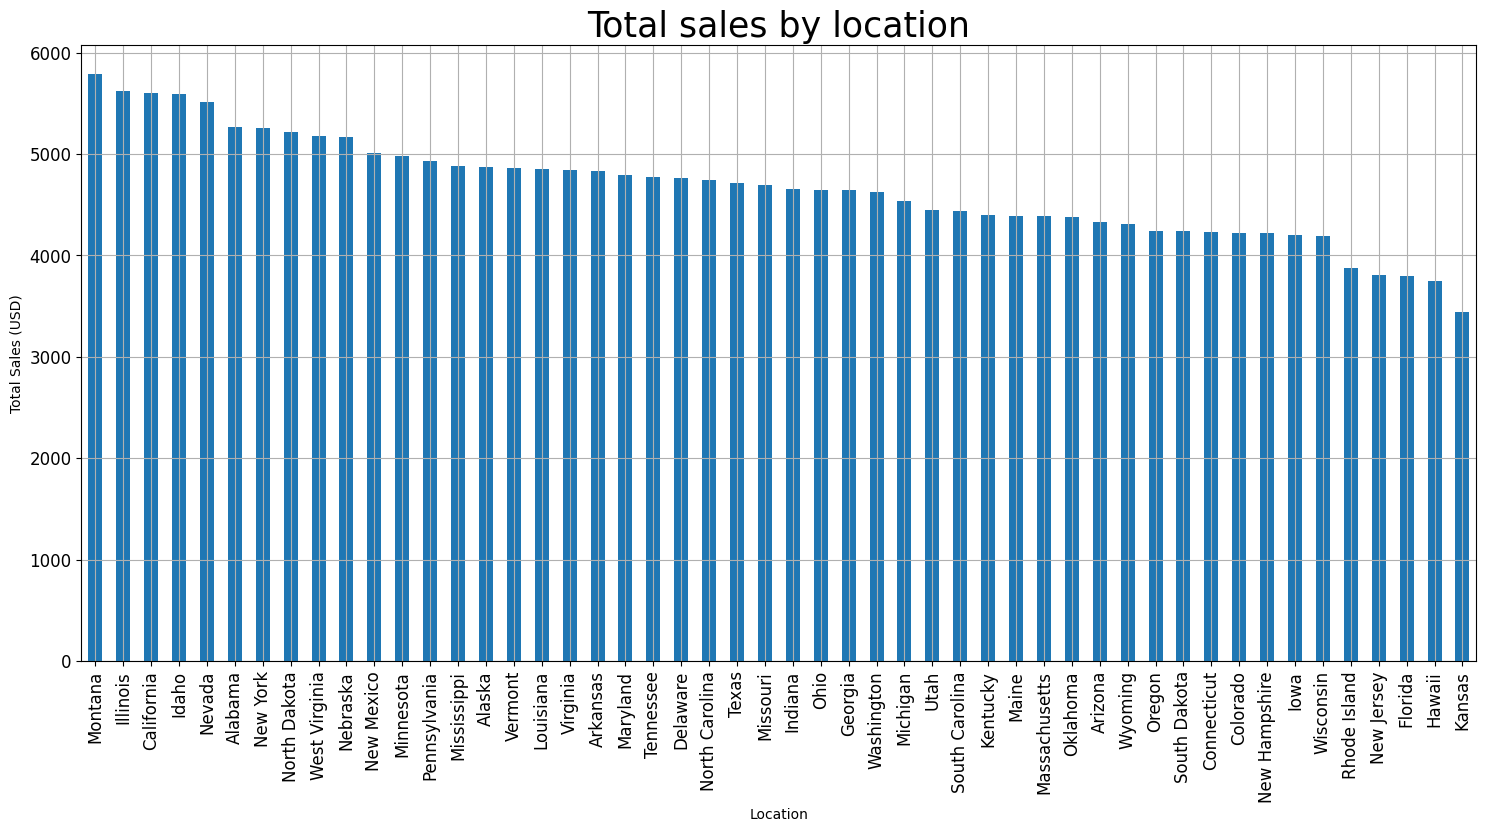

<Figure size 640x480 with 0 Axes>

In [23]:
# Total sales per location
sales_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending = False)
plt.figure(figsize = (18, 8))
bar_plot(sales_by_location, 'Location', 'Total Sales (USD)', 'Total sales by location', font_size = 12 )

In [24]:
# Insights from above plot:
# Montana has the most customers out of every other location.
# Marketing campaigns might be targeted towards the smaller numbers such as Rhode Island, Florida, Kansas to attract a new demographic of buyers.

# Sales per payment Method:

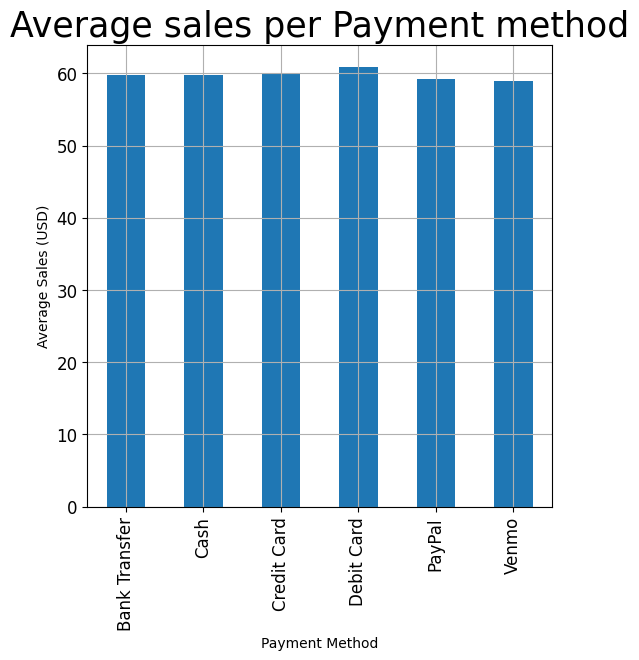

<Figure size 640x480 with 0 Axes>

In [25]:
# Average sales per Payment method
pay_method_data = df.groupby('Payment Method')['Purchase Amount (USD)'].mean()
plt.figure(figsize = (6, 6))
bar_plot(pay_method_data, 'Payment Method', 'Average Sales (USD)', 'Average sales per Payment method')

# Sales per Subscription:

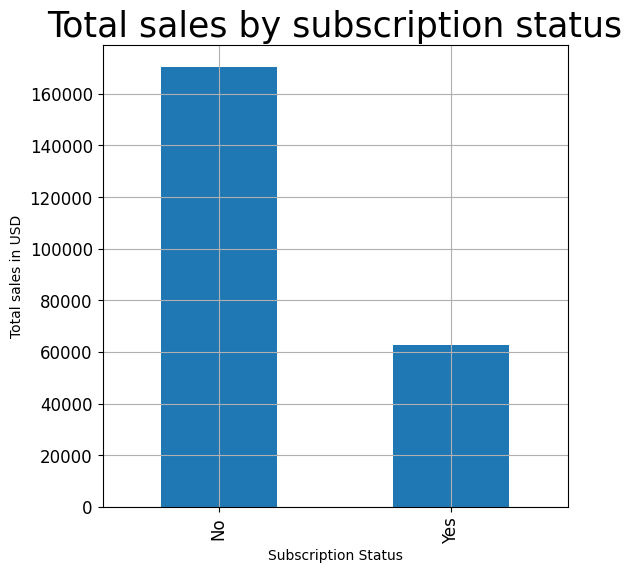

<Figure size 640x480 with 0 Axes>

In [26]:
subscribers_data = df.groupby('Subscription Status')['Purchase Amount (USD)'].sum()
plt.figure(figsize = (6,6))
bar_plot(subscribers_data, 'Subscription Status', 'Total sales in USD', 'Total sales by subscription status')

In [27]:
# Customers who didn't have subscription has highest sales but regular customer have subscription have purchased less

# Discount Availing:

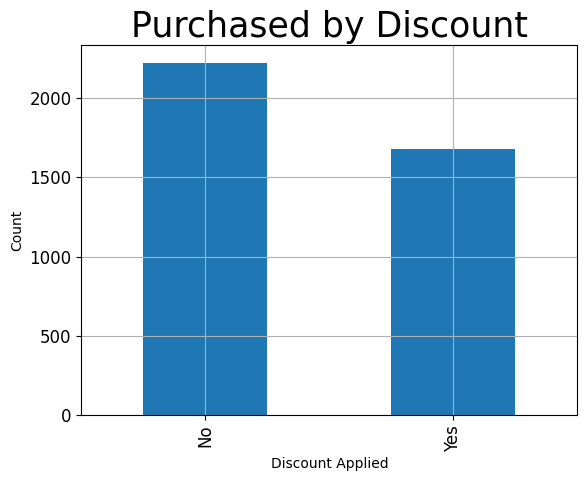

<Figure size 640x480 with 0 Axes>

In [28]:
# Discount applied
discount_applied = df["Discount Applied"].value_counts()
bar_plot(discount_applied, 'Discount Applied', 'Count', 'Purchased by Discount')

# Histograms

In [29]:
# Majority of customers doesn't avail discounts and purchase with discounts

In [30]:
def hist_plot(dataframe, x_axis, y_axis, title, color):
  ''' Function takes x, y an dataframe values and will plot histogram plot'''
  plt.figure(figsize = (4,4))
  sns.histplot(data=df, x = x_axis, kde=True, color=color)
  plt.title(title)
  plt.xlabel(x_axis)
  plt.xticks(rotation = 90)
  plt.grid(True)
  plt.show()

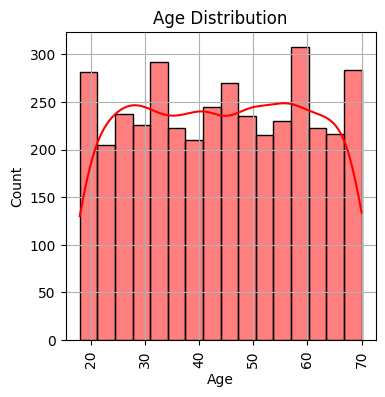

In [31]:
hist_plot(df, 'Age', 'Count','Age Distribution', 'red')

In [32]:
# The above histogram shows that customers who purchase having age between 20 and 70.
# majority of customers are 35 +

# Label Encoding:

In [33]:
df.columns # developing an array of columns name

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [34]:
categorical_df = df.select_dtypes(include=['object', 'category']) # Extracting categorical columns for label encoding
categorical_columns = categorical_df.columns

In [35]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is  dataframe with categorical columns
label_encoder = LabelEncoder()
encoded_df = df.copy()

for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(df[col])

In [36]:
for col in categorical_columns:
  print(encoded_df[col].value_counts())

Gender
1    2652
0    1248
Name: count, dtype: int64
Item Purchased
2     171
12    171
13    171
16    169
5     166
23    164
10    163
1     161
22    161
4     161
14    160
21    159
19    158
18    157
15    157
8     154
7     153
9     151
17    150
24    147
20    145
3     144
0     143
6     140
11    124
Name: count, dtype: int64
Category
1    1737
0    1240
2     599
3     324
Name: count, dtype: int64
Location
25    96
4     95
11    93
12    92
0     89
22    88
26    87
31    87
27    87
19    86
7     86
44    85
17    84
33    83
24    81
47    81
30    81
23    80
13    79
9     79
16    79
3     79
32    78
6     78
45    77
34    77
41    77
42    77
18    77
39    76
5     75
35    75
48    75
36    74
37    74
46    73
21    73
1     72
20    72
49    71
43    71
28    71
40    70
14    69
8     68
29    67
10    65
2     65
15    63
38    63
Name: count, dtype: int64
Size
1    1755
0    1053
2     663
3     429
Name: count, dtype: int64
Color
13    177
24    174

# Correlation:

In [37]:
corr = encoded_df.corr() # Now find correlation between features using corr( ) functions
corr

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,1.000000,-0.004079,-0.807960,0.003648,-0.004133,0.011048,-0.013257,-0.001801,-0.011144,-0.018027,0.001343,-0.768960,-0.020979,-0.857496,-0.857496,-0.039159,-0.015504,-0.012250
Age,-0.004079,1.000000,0.002763,-0.000636,0.003546,-0.010424,-0.001957,-0.023654,0.006700,-0.028418,-0.021949,0.006492,-0.010743,0.004366,0.004366,0.040445,-0.005215,0.017406
Gender,-0.807960,0.002763,1.000000,0.001921,-0.004144,-0.014044,0.000747,0.018764,-0.000560,0.016258,0.008164,0.417197,0.016490,0.595823,0.595823,0.035873,0.003369,0.012829
Item Purchased,0.003648,-0.000636,0.001921,1.000000,0.052951,-0.005342,0.020390,-0.008942,0.027241,0.012755,-0.004621,0.003028,0.016244,-0.013983,-0.013983,-0.001513,-0.006695,0.015249
Category,-0.004133,0.003546,-0.004144,0.052951,1.000000,-0.017841,0.000541,-0.035916,0.009119,0.000141,-0.000299,0.011022,-0.009031,0.000572,0.000572,-0.015669,-0.000776,0.012190
Purchase Amount (USD),0.011048,-0.010424,-0.014044,-0.005342,-0.017841,1.000000,0.028803,0.027805,-0.004326,-0.018358,0.030776,-0.006996,-0.024637,-0.017798,-0.017798,0.008063,-0.009077,-0.017219
Location,-0.013257,-0.001957,0.000747,0.020390,0.000541,0.028803,1.000000,0.000275,-0.004944,0.012259,-0.004222,0.004529,-0.001458,0.011926,0.011926,-0.032962,-0.006931,-0.012740
Size,-0.001801,-0.023654,0.018764,-0.008942,-0.035916,0.027805,0.000275,1.000000,-0.005124,-0.009286,0.027603,-0.014501,0.001020,-0.001804,-0.001804,-0.011152,-0.033220,-0.008860
Color,-0.011144,0.006700,-0.000560,0.027241,0.009119,-0.004326,-0.004944,-0.005124,1.000000,-0.000109,0.027356,0.021333,-0.000034,0.019394,0.019394,0.000418,-0.007578,-0.009938
Season,-0.018027,-0.028418,0.016258,0.012755,0.000141,-0.018358,0.012259,-0.009286,-0.000109,1.000000,0.000160,-0.005139,0.019122,0.015550,0.015550,0.024333,-0.005520,0.009568


In [38]:
encoded_df.drop(['Customer ID', 'Location'], axis=1, inplace = True) # Removing additional columns that doesn't aid the dataframe

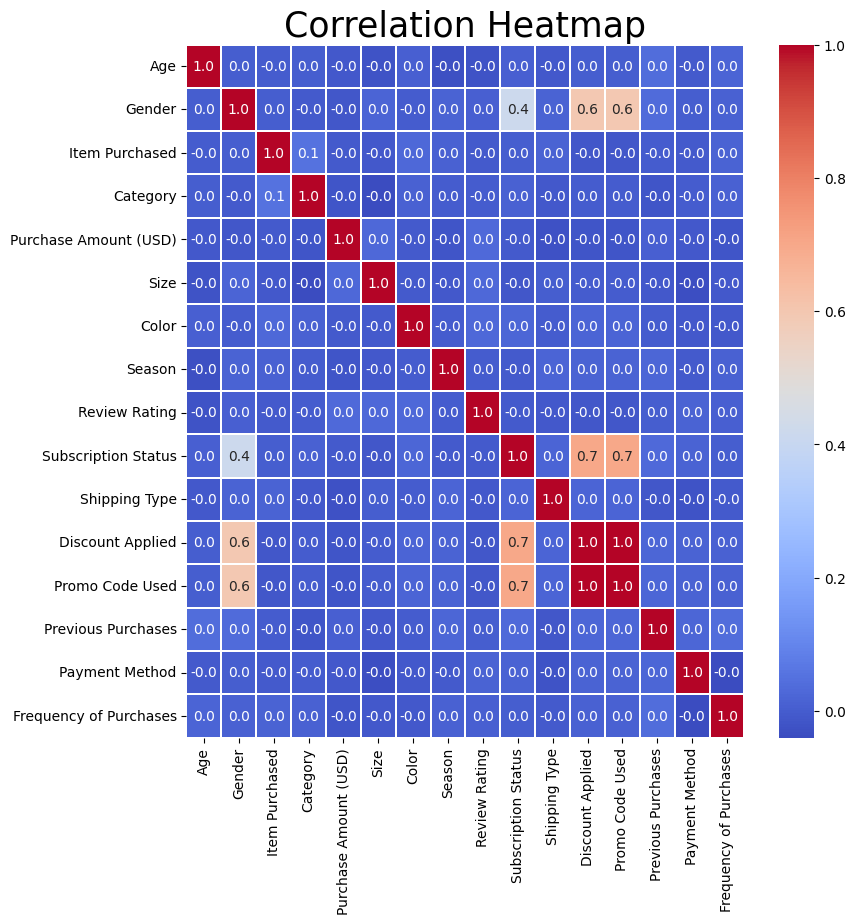

<Figure size 640x480 with 0 Axes>

In [39]:
correlation_matrix = encoded_df.corr()
# Plotting heatmap for viualising correlation
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.title('Correlation Heatmap', fontsize=25)
plt.show()
plt.savefig('correlation heatmap')

In [40]:
# The above map shows that the features 'Gender', 'Promo Code Used' and 'Discount Applied' have high correlation and causing multicollinearity
# We will drop feature 'Promo Code Used' and 'Discount Applied' to handle the issue

In [41]:
encoded_df.drop(['Promo Code Used', 'Discount Applied'], axis = 1, inplace = True)

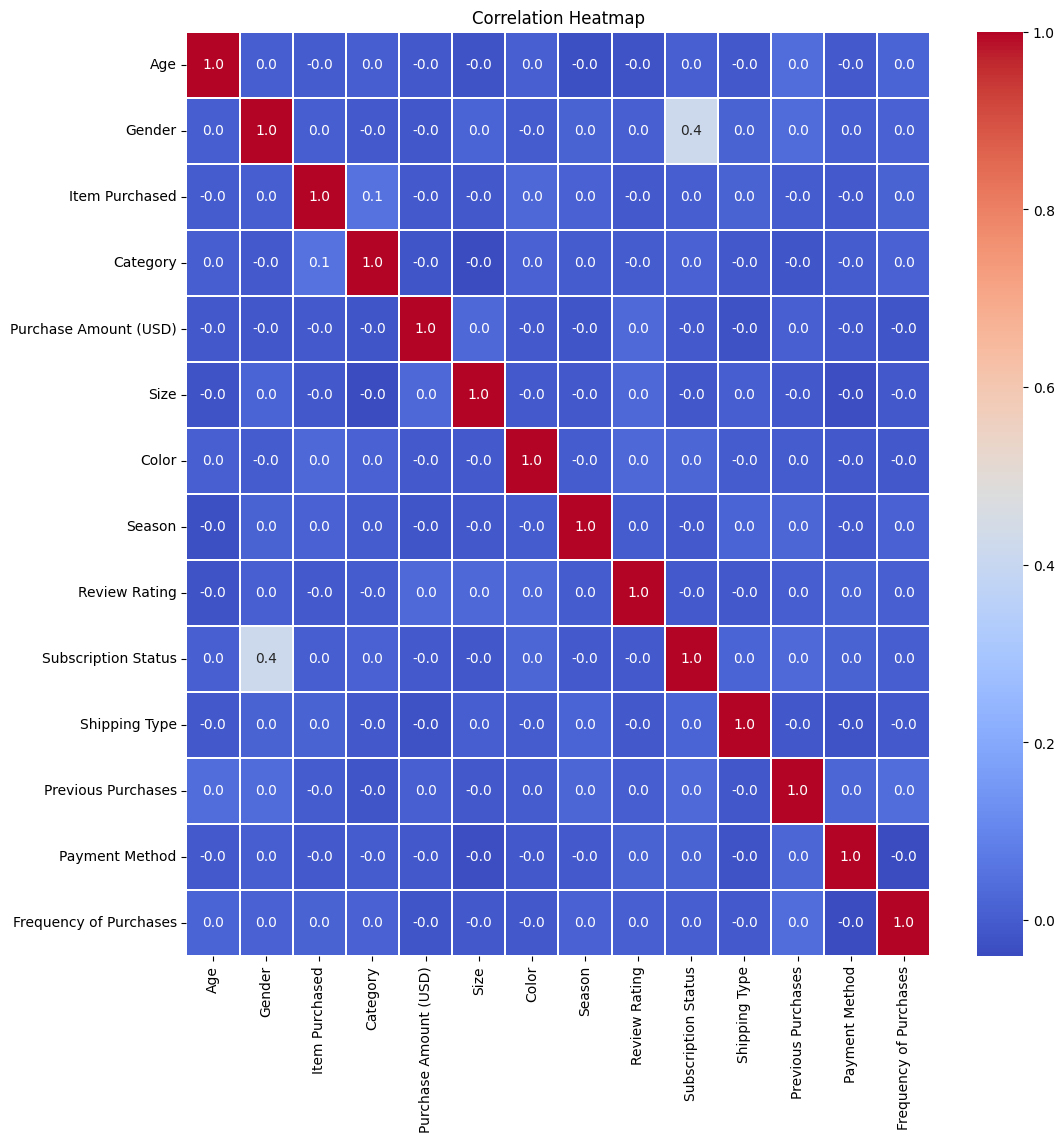

In [42]:
correlation_matrix = encoded_df.corr()
# Now again heatmap to visualise correlation
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()


In [43]:
encoded_df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status',
       'Shipping Type', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [44]:
encoded_df.head(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases
0,55,1,2,1,53,0,7,3,3.1,1,1,14,5,3
1,19,1,23,1,64,0,12,3,3.1,1,1,2,1,3
2,50,1,11,1,73,2,12,1,3.1,1,2,23,2,6
3,21,1,14,2,90,1,12,1,3.5,1,3,49,4,6
4,45,1,2,1,49,1,21,1,2.7,1,2,31,4,0


# Feature Engineering:

In [45]:
# Extracting Numerical and independent features for training K_means cluster

In [46]:
features = encoded_df[['Age', 'Purchase Amount (USD)', 'Review Rating','Previous Purchases']]

# Scaling:

In [47]:
# Scaling the dataset by using Standard scaler library from sklearn (Standardization)

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)
df_scaled

array([[ 0.71891344, -0.28562864, -0.90758357, -0.78583067],
       [-1.64862924,  0.17885219, -0.90758357, -1.61655226],
       [ 0.39008807,  0.55888195, -0.90758357, -0.16278948],
       ...,
       [ 0.12702777, -1.13013923, -1.18686209, -0.09356268],
       [-0.00450238,  0.72778407,  0.06989124, -0.09356268],
       [ 0.52161822,  0.89668619, -0.90758357,  0.52947851]])

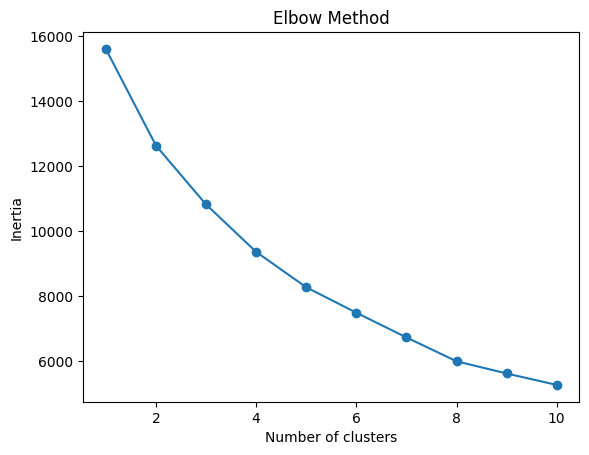

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store inertia values for different number of clusters
inertia_values = []

# Loop through different values of k
for k in range(1, 11):
    # Initialize KMeans with current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)

    # Fit KMeans to the scaled data
    kmeans.fit(df_scaled)  # Using df_scaled is  scaled data

    # Append the inertia value (sum of squared distances of samples to their closest cluster center)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [50]:
# Based on the plot, it appears to be a line graph depicting the Elbow Method, a technique used to identify the optimal number of clusters in k-means clustering.
# The x-axis represents the number of clusters (k), and the y-axis represents inertia (the sum of squared distances within each cluster).
# The Elbow Method suggests choosing the number of clusters where the curve starts to flatten out significantly.
# In this graph, it's difficult to pinpoint a clear elbow due to the gradual decrease in inertia. However, there might be a subtle bend around k=4, indicating a possible inflection point.
# We will develop cluster and then visualize them and will decide the optimal value of cluster.

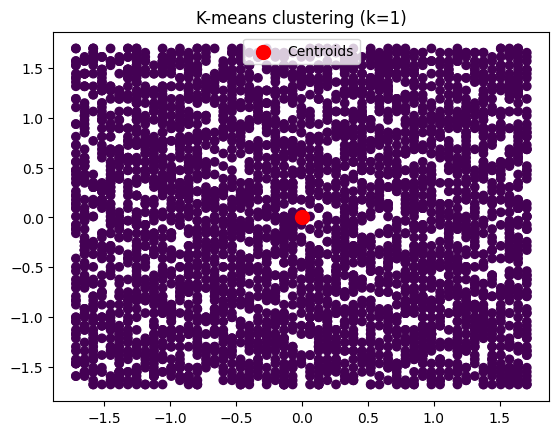

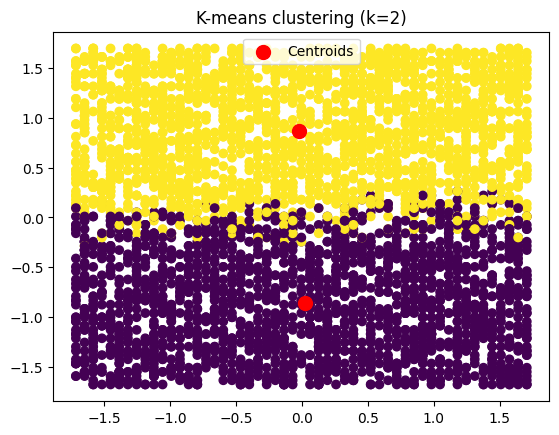

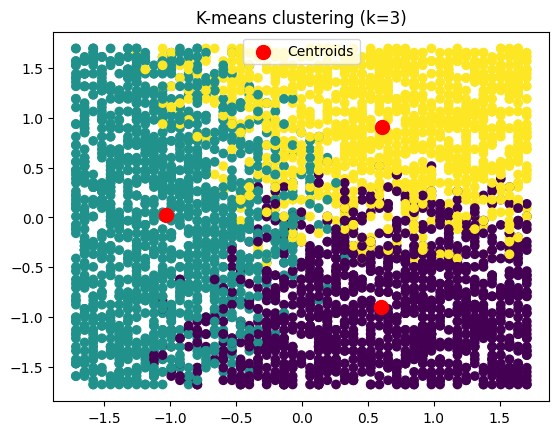

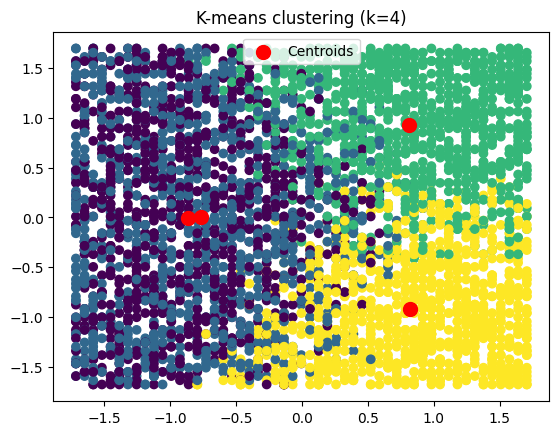

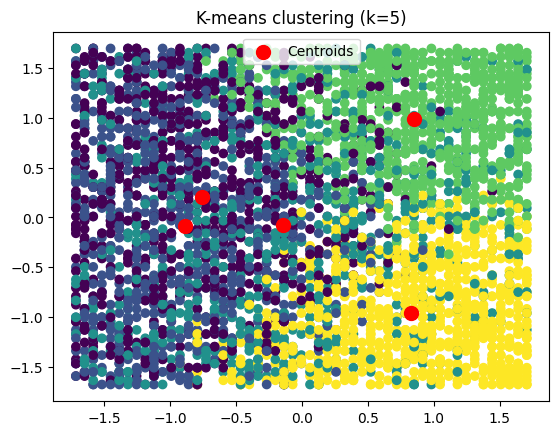

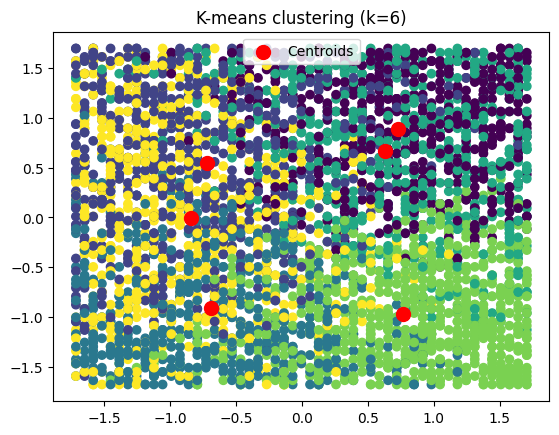

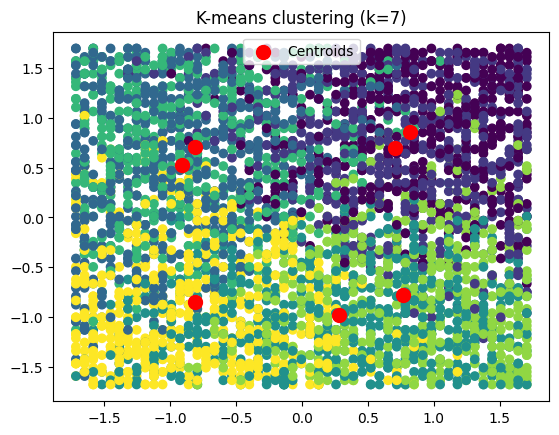

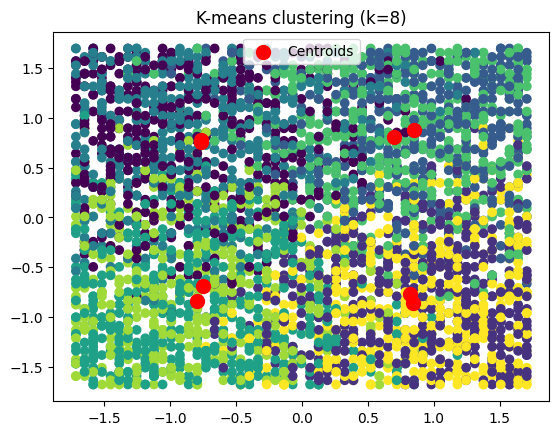

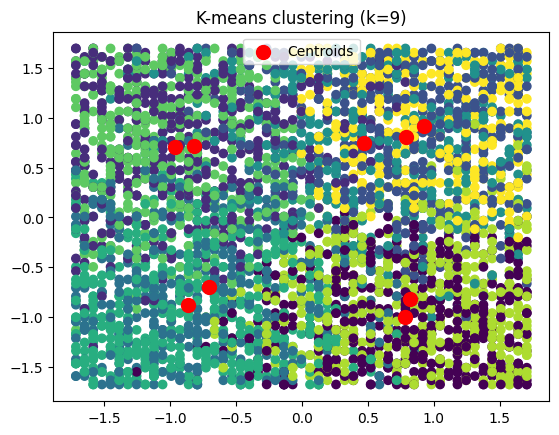

In [51]:
import matplotlib.pyplot as plt

# Create a range of values for k
k_range = range(1, 10)

# Initialize an empty list to
# store the inertia values for each k
inertia_values = []

# Fit and plot the data for each k value
for k in k_range:
	kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=500, n_init=10, random_state=0)
	y_kmeans = kmeans.fit_predict(df_scaled)
	inertia_values.append(kmeans.inertia_)
	plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_kmeans)
	plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
	plt.title('K-means clustering (k={})'.format(k))
	plt.legend()
	plt.show()

In [52]:
# Base on the above plots, we can examine the optimal numbers of clusters should be 4.
# We can also make 3 clusters but it depends on need and requirements

# Line Fitting:

In [53]:
# For line fitting, Consider below assumptions:
# We want to predict the Purchased Amount value with the age of customers
# Here, we will use Simple Linear Regression Model
# Independent variable = 'Age'
# Dependent variable = 'Purchase Amount (USD)'

In [54]:
X_feature = encoded_df[['Age']]
y_feature = encoded_df[['Purchase Amount (USD)']]

In [55]:
x = scaler.fit_transform(X_feature)
y = scaler.fit_transform(y_feature)

# Linear Regression with sklearn:

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

 #Independent variables
XY = pd.DataFrame(x)
# Dependent variable
Z = y
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XY, Z, test_size=0.2, random_state=42)
# Perform multiple linear regression
mlr = LinearRegression()
# Fit the model
mlr.fit(X_train, y_train)

# Predict on test data
y_pred = mlr.predict(X_test)

print(mlr.coef_)

# Get the coefficients
β1 = mlr.coef_[0][0]
# Get the intercept
α = mlr.intercept_

print(α)

[[-0.01368412]]
[0.01596319]


In [57]:
from scipy import stats as st
# Re-format the results of the linear regression
params = np.append(mlr.coef_, mlr.intercept_)
# Use the model to predict other output values
predictions = mlr.predict(X_test)
# Sum of squared residuals
sum_sq_residuals = sum((y_test - predictions)**2)
# Degrees of freedom (sample size - number of parameters)
dof = len(y_train) - len(params)
# Mean squared error
mse = sum_sq_residuals / dof
# Add a constant
X_train['Constant'] = 1
# Covariances of the parameters ('@'' is the dot product)
cov = mse * np.diagonal(np.linalg.inv(X_train.T @ X_train))
# Standard errors of the parameters
se = np.sqrt(cov)
# t-statistics associated with the parameters
t_statistics = params / se
# Two-tailed test
tails = 2
# Calculate the p-values
p_values = [tails * (1 - st.t.cdf(np.abs(t), dof)) for t in t_statistics]
# Significance level
alpha = 0.05
# Percent-point function (aka quantile function) of the t-distribution
t = st.t.ppf(1 - (alpha / tails), dof)
# Margin of error
d = t * se
# 95% confidence interval
upper_ci = params + d
lower_ci = params - d

In [58]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

# Display the results
output = [params, se, t_statistics, np.array(p_values), lower_ci, upper_ci]
index = ['Value', 'Standard Error', 't-Statistic', 'p-Value', 'Lower CI', 'Upper CI']
output = pd.DataFrame(output, index=index, columns=list(X_train)).round(3)
output = output.T
print(output)

          Value  Standard Error  t-Statistic  p-Value  Lower CI  Upper CI
0        -0.014           0.009       -1.525    0.127    -0.031     0.004
Constant  0.016           0.009        1.779    0.075    -0.002     0.034


In [59]:
# We can visualize all statistical value related to linear regression model

# Confidence Interval Plot Using Seaborn library:

In [60]:
# Assumption
# Here we are taking 20 random values from the Age and Purchase amount column to understand and visualizing the plot clearly

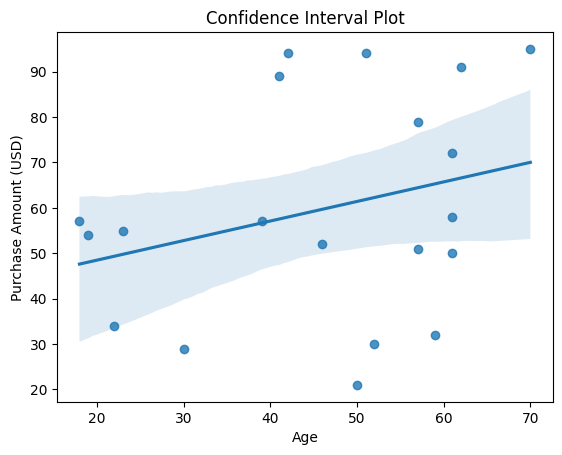

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random indices
random_indices = np.random.choice(np.arange(1, 3000), size=20, replace=False)

# Create a DataFrame with random indices and corresponding rows from the original DataFrame
random_df = encoded_df.iloc[random_indices]

# Plot regplot using seaborn
sns.regplot(x='Age', y='Purchase Amount (USD)', data=random_df)
plt.title('Confidence Interval Plot')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Confidence Interval using statsmodel

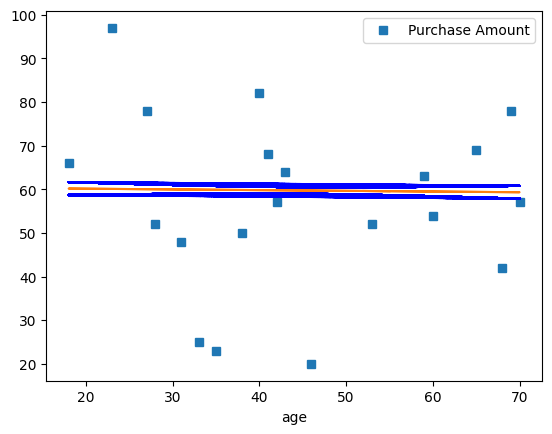

In [62]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.DataFrame({'age': X_feature.values.flatten() ,
                   'Purchase Amount': y_feature.values.flatten()})
df['age'] = df['age'].astype(float)
X = sm.add_constant(df['age'].values)
ols_model = sm.OLS(df['Purchase Amount'].values, X)
est = ols_model.fit()
out = est.conf_int(alpha=0.05, cols=None)

# Generate random indices
random_indices = np.random.choice(np.arange(1, 3000), size=20, replace=False)
# Assuming 'df' is your DataFrame
# Create a DataFrame with random indices and corresponding rows from the original DataFrame
random_df = df.iloc[random_indices]

fig, ax = plt.subplots()
random_df.plot(x='age',y='Purchase Amount',linestyle='None',marker='s', ax=ax)
y_pred = est.predict(X)
x_pred = df.age.values
ax.plot(x_pred,y_pred)

pred = est.get_prediction(X).summary_frame()
ax.plot(x_pred,pred['mean_ci_lower'],linestyle='--',color='blue')
ax.plot(x_pred,pred['mean_ci_upper'],linestyle='--',color='blue')

# Error Bar Plot:

R-squared: -0.01


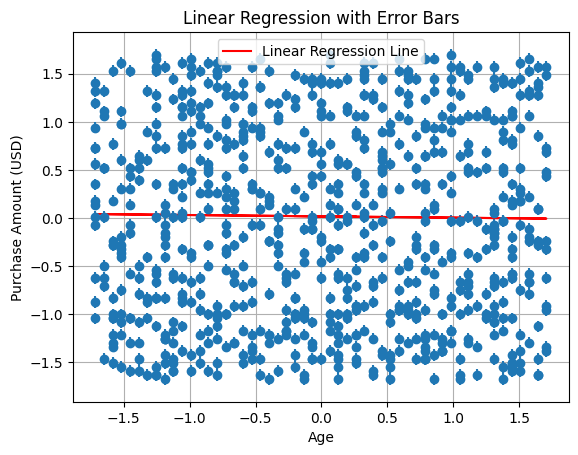

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate confidence interval
confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
mse = np.mean(squared_errors)
std_dev = np.std(squared_errors)
margin_of_error = 1.96 * (std_dev / np.sqrt(len(y_pred)))
confidence_interval = (mse - margin_of_error, mse + margin_of_error)
# Generate random indices to select 20 values
random_indices = np.random.choice(np.arange(3000), size=20, replace=False)
# Plot data points with error bars

plt.errorbar(X_test.flatten(), y_test.flatten(), yerr=margin_of_error, fmt='o', )

# Plot linear regression line
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line')

# # Calculate and display R-squared value
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared:.2f}')

plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Linear Regression with Error Bars')
plt.legend()
plt.grid(True)
plt.show()
